In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import random

import pickle

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import *

from simplicial_kuramoto.frustration_scan import *

In [2]:
def is_in_subspace(vector,matrix):
    ns=sc.linalg.null_space(matrix.todense())
    
    coeff=vector.dot(ns)
    ns_dim=coeff.shape
    
    vector_hat=np.zeros(ns.shape[0])

    for i in range(ns.shape[1]):
        vector_hat+=coeff[i]*ns[:,i]
    
    error=np.sum(np.abs(vector-vector_hat))
    
    return error, vector_hat, coeff, ns_dim

## One hole square

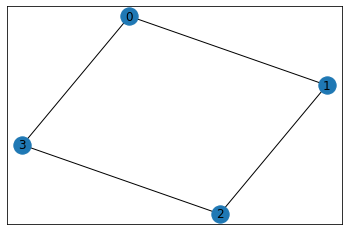

In [3]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=0)
G.add_edge(2,3,weight=1,edge_com=0)
G.add_edge(3,0,weight=1,edge_com=0)

node_com_dict=dict(zip(list(np.linspace(0,3,4).astype(int)),[0,0,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

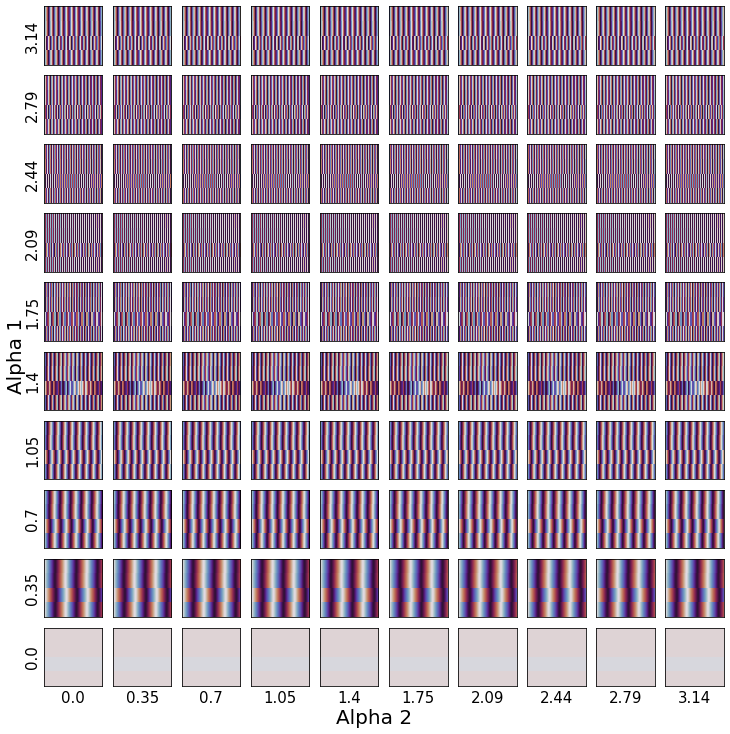

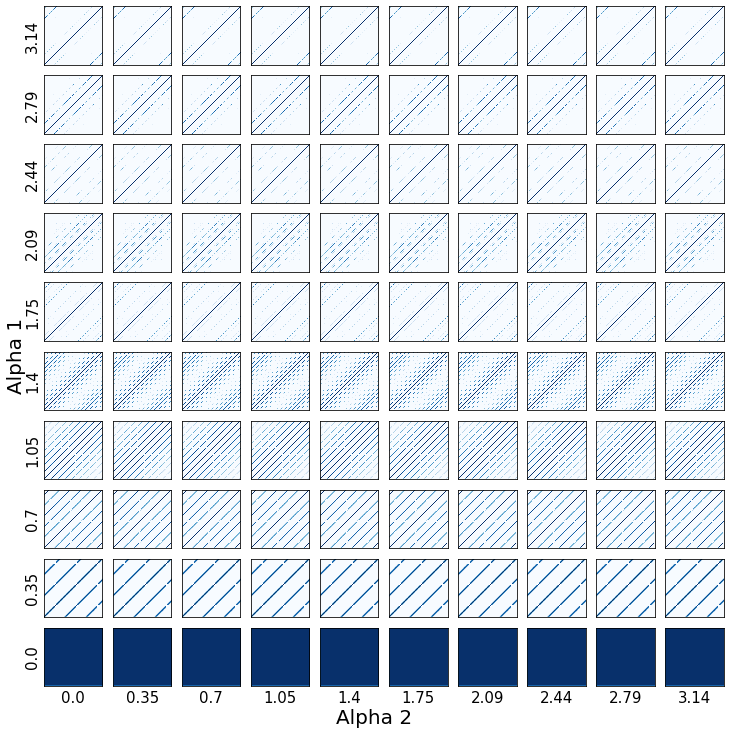

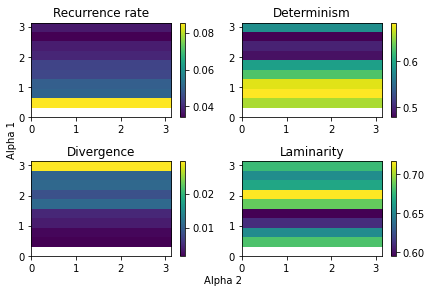

In [4]:
folder = "./results/"

path = folder + "square.pkl"
filename = "square.pdf"
plot_phases(path, filename)
plot_recurences(path, filename, eps=0.1, steps=10)
plot_rqa(path, filename, frac=0.2, min_rr=0.3)

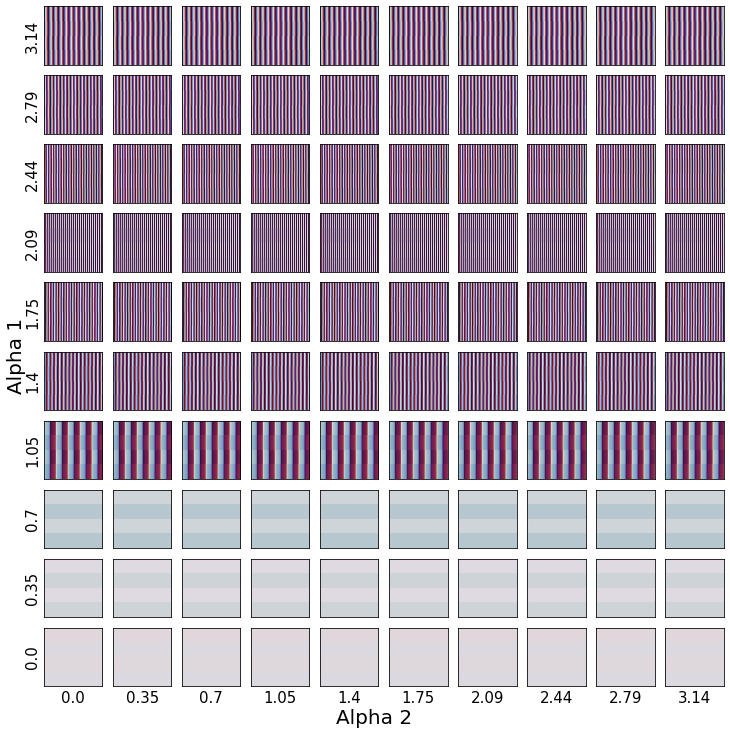

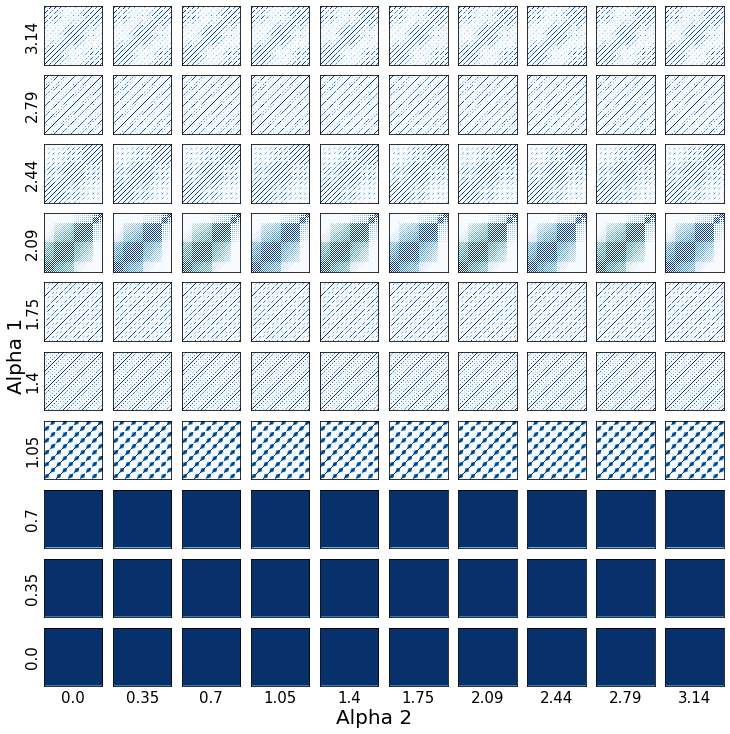

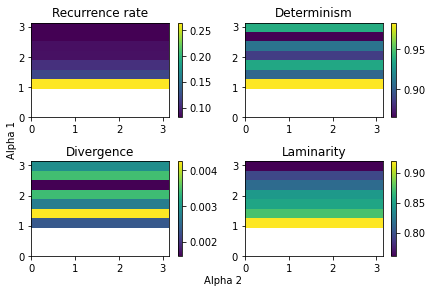

In [5]:
folder = "./results/"

path = folder + "square_flip.pkl"
filename = "square_flip.pdf"
plot_phases(path, filename)
plot_recurences(path, filename, eps=0.1, steps=10)
plot_rqa(path, filename, frac=0.2, min_rr=0.3)

## Hexagone

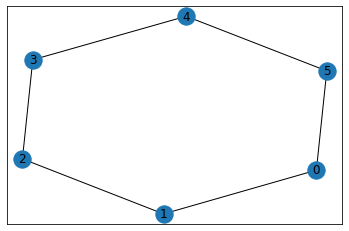

In [6]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=1)
G.add_edge(2,3,weight=1,edge_com=2)
G.add_edge(3,4,weight=1,edge_com=0)
G.add_edge(4,5,weight=1,edge_com=1)
G.add_edge(5,0,weight=1,edge_com=2)

node_com_dict=dict(zip(list(np.linspace(0,5,6).astype(int)),[0,0,0,0,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

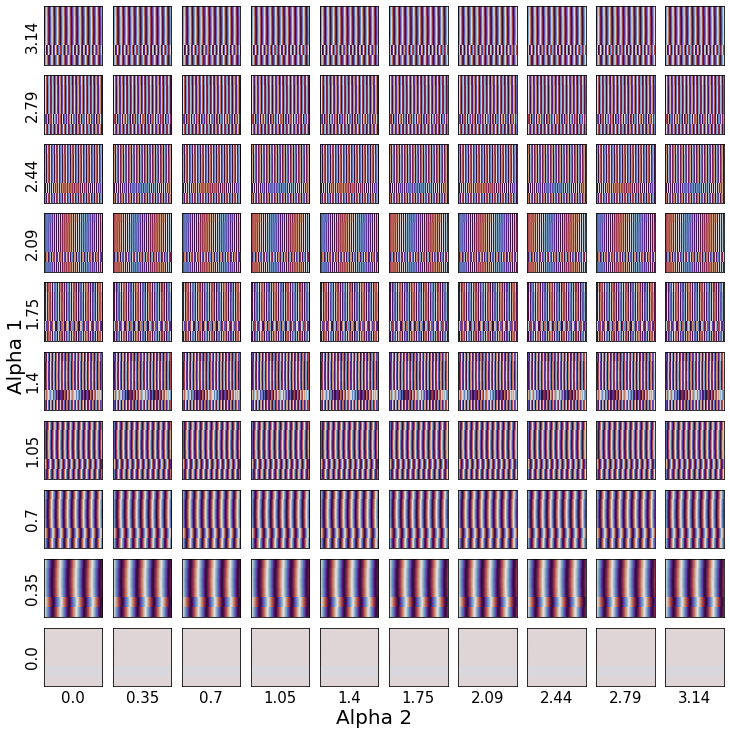

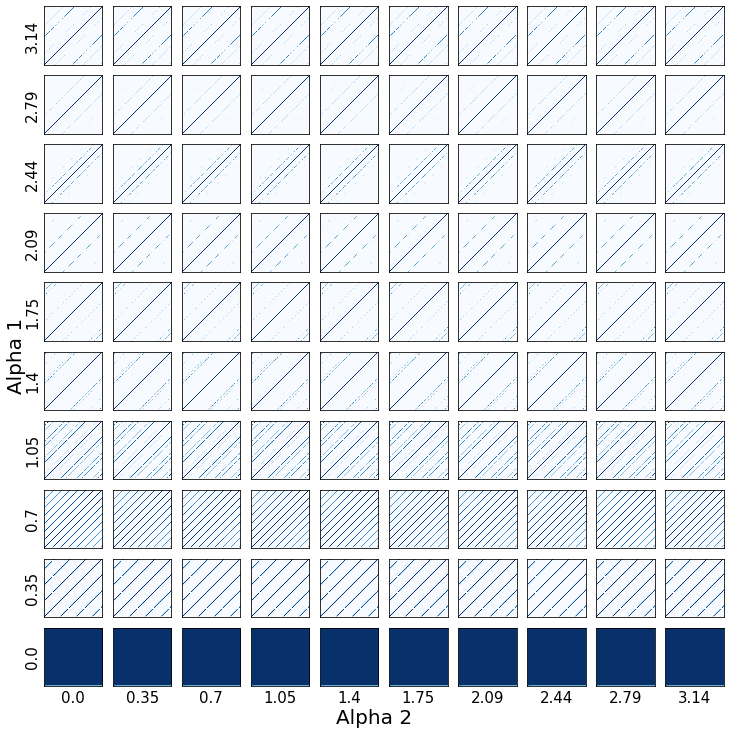

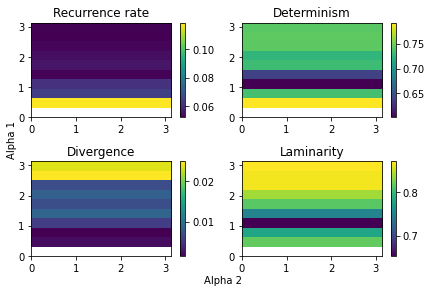

In [7]:
folder = "./results/"

path = folder + "hexagone.pkl"
filename = "hexagone.pdf"
plot_phases(path, filename)
plot_recurences(path, filename, eps=0.1, steps=10)
plot_rqa(path, filename, frac=0.2, min_rr=0.3)

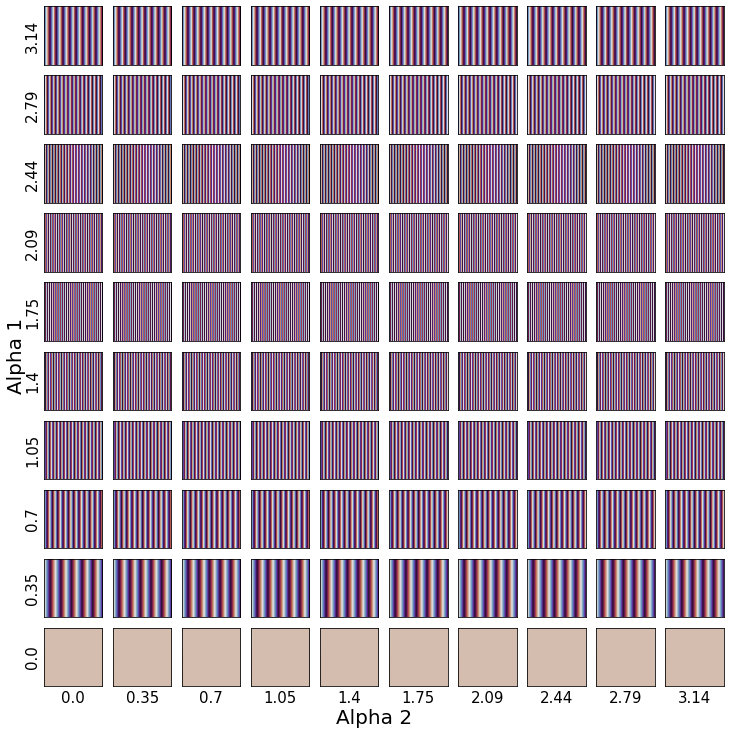

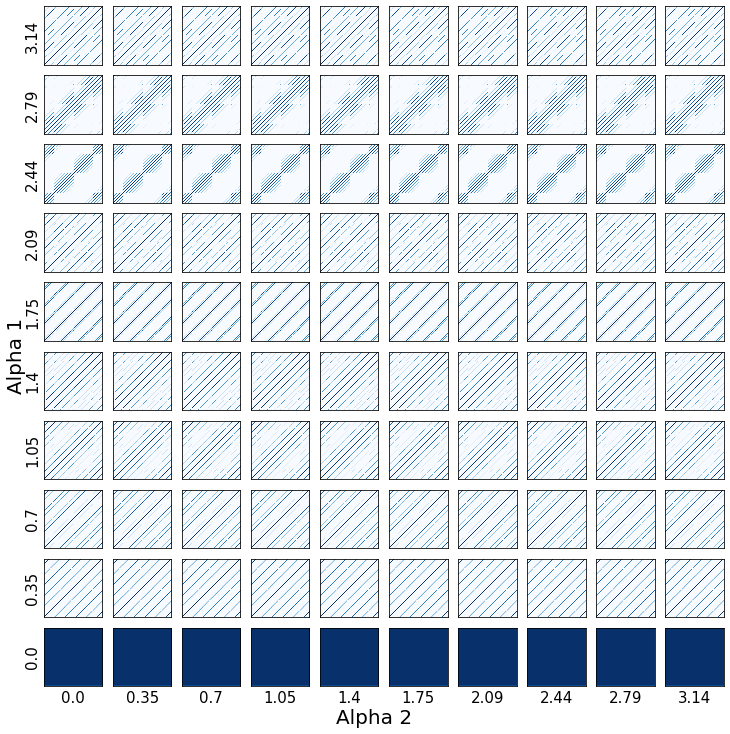

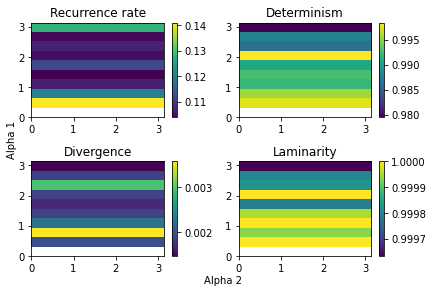

In [8]:
folder = "./results/"

path = folder + "hexagone_flip.pkl"
filename = "hexagone_flip.pdf"
plot_phases(path, filename)
plot_recurences(path, filename, eps=0.1, steps=10)
plot_rqa(path, filename, frac=0.2, min_rr=0.3)

## House

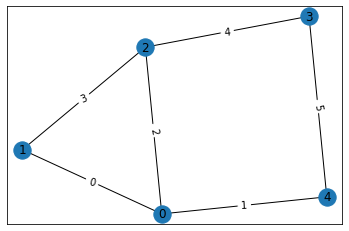

In [9]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=0)
G.add_edge(2,3,weight=1,edge_com=0)
G.add_edge(3,4,weight=1,edge_com=0)
G.add_edge(4,0,weight=1,edge_com=0)
# G.add_edge(5,0,weight=1,edge_com=0)

G.add_edge(2,0,weight=1,edge_com=0)

node_com_dict=dict(zip(list(np.linspace(0,5,6).astype(int)),[0,0,0,0,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

Gsc=SimplicialComplex(graph=G, no_faces=False)

# plt.figure()
# nx.draw_networkx(G)
# plt.show()
pos = nx.spring_layout(G,)
plt.figure()
nx.draw_networkx_nodes(G, pos=pos)
edge_labels = dict(((u, v), d) for d, (u, v) in enumerate(G.edges))                                                                                                                                                                                                                                         
node_labels = dict((u, d) for d, u in enumerate(G.nodes))                                                                                                                                                                                                                                                   
_=nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)  
_=nx.draw_networkx_labels(G, pos=pos, labels=node_labels)
_=nx.draw_networkx_edges(G,pos=pos)

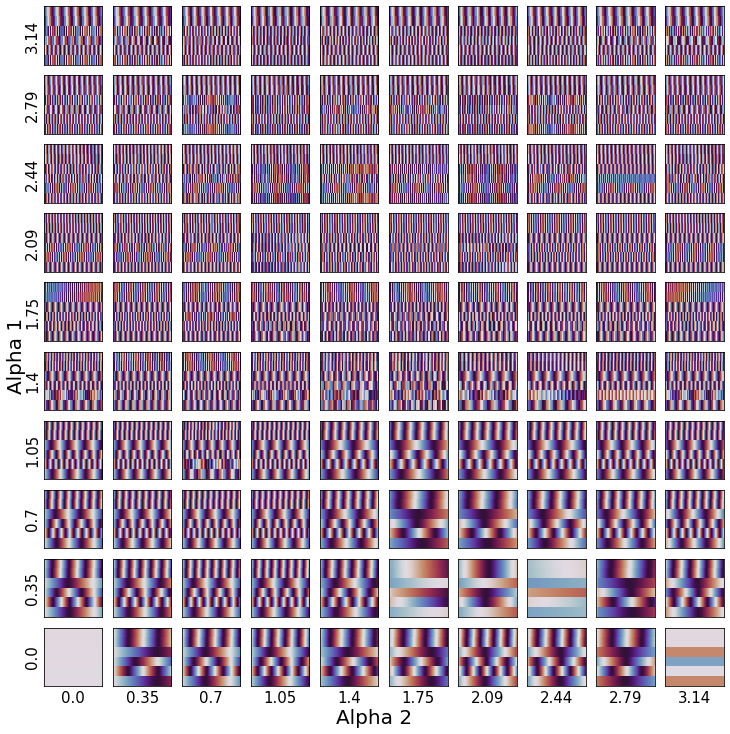

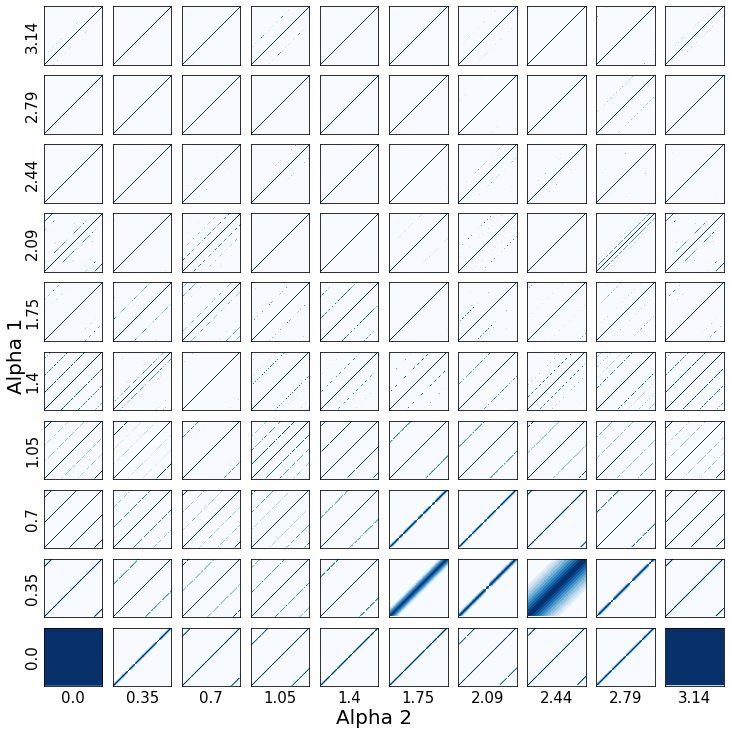

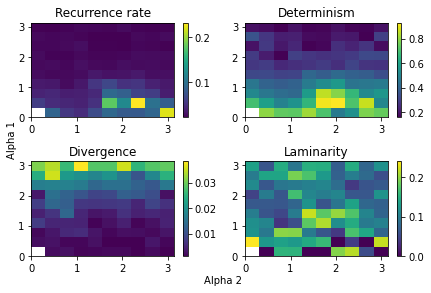

In [10]:
folder = "./results/"

path = folder + "house.pkl"
filename = "house.pdf"
plot_phases(path, filename)
plot_recurences(path, filename, eps=0.1, steps=10)
plot_rqa(path, filename, frac=0.2, min_rr=0.3)

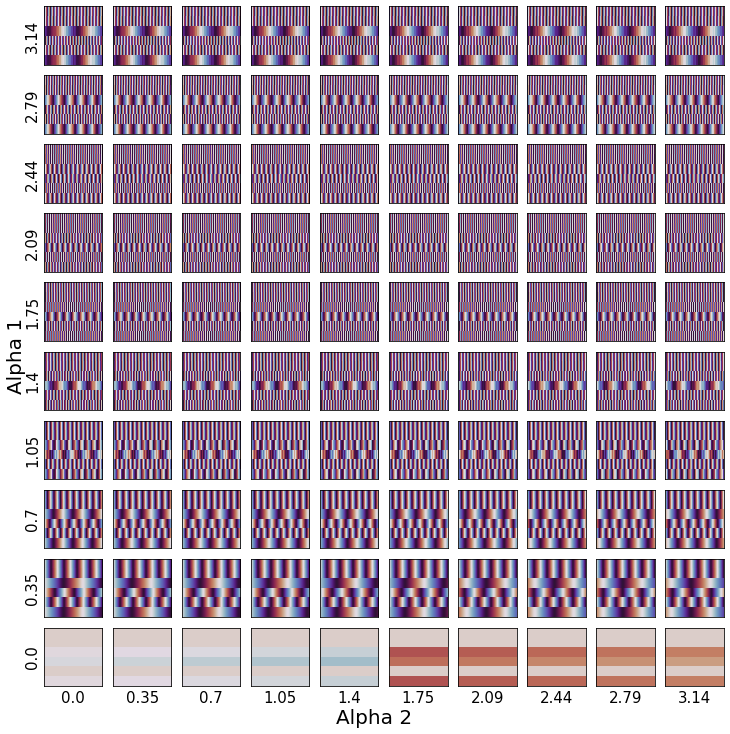

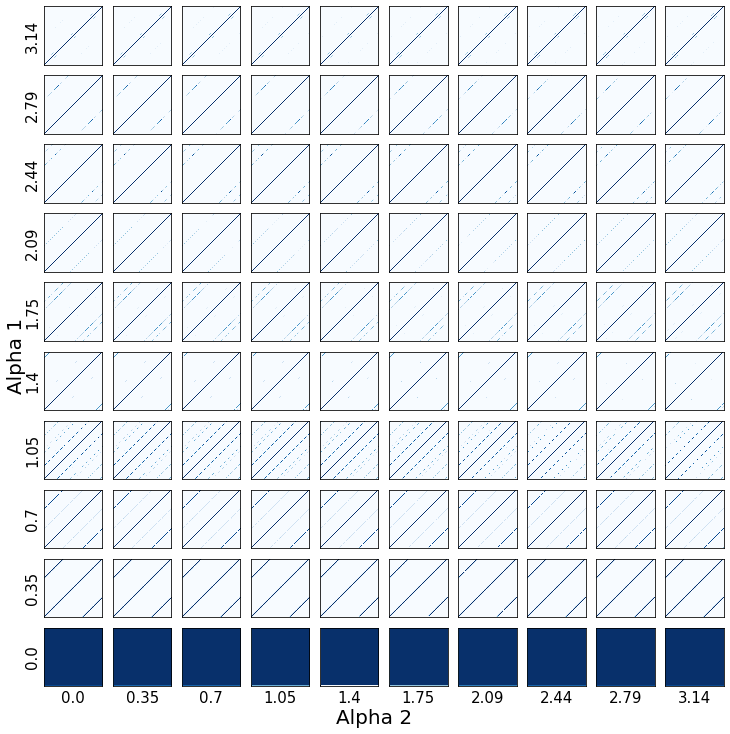

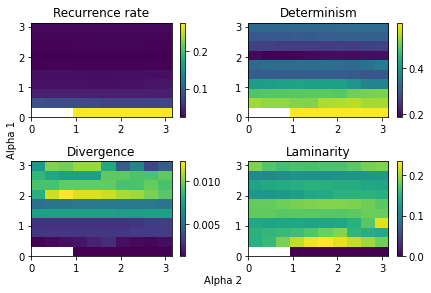

In [11]:
folder = "./results/"

path = folder + "house_hole_cyle.pkl"
filename = "house_hole_cyle.pdf"
plot_phases(path, filename)
plot_recurences(path, filename, eps=0.1, steps=10)
plot_rqa(path, filename, frac=0.2, min_rr=0.3)

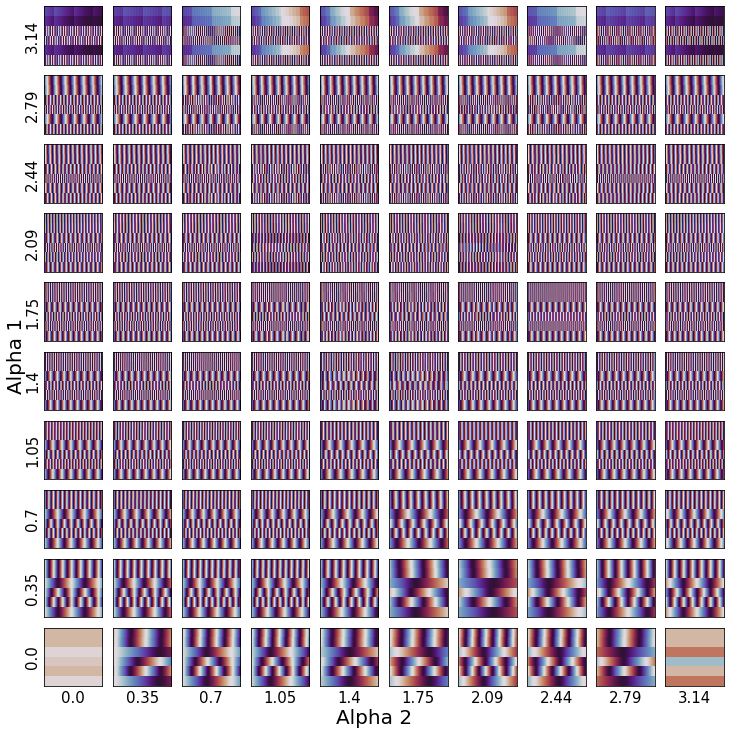

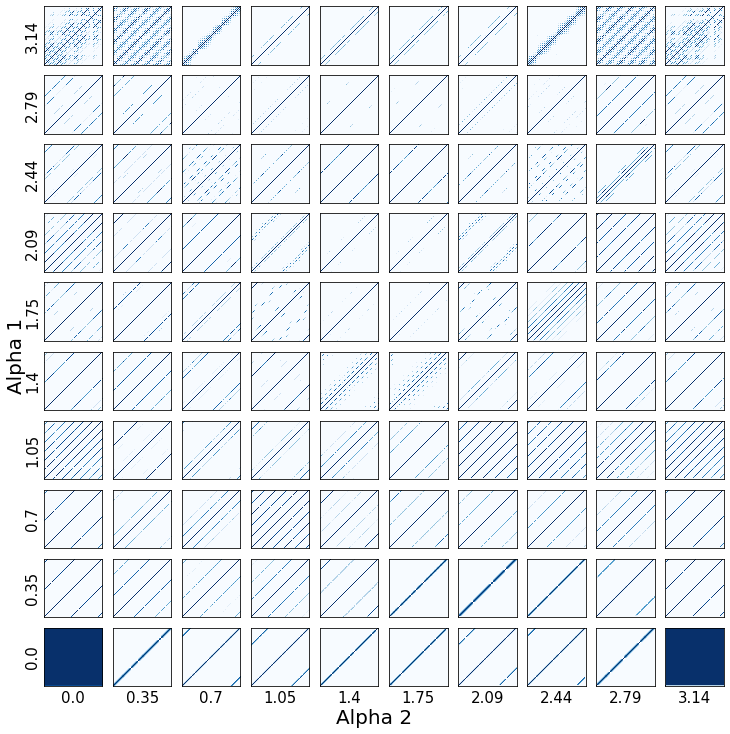

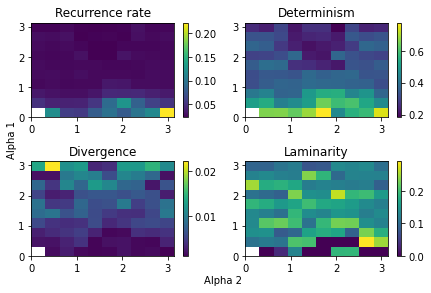

In [12]:
folder = "./results/"

path = folder + "house_triangle_cyle.pkl"
filename = "house_triangle_cyle.pdf"
plot_phases(path, filename)
plot_recurences(path, filename, eps=0.1, steps=10)
plot_rqa(path, filename, frac=0.2, min_rr=0.3)

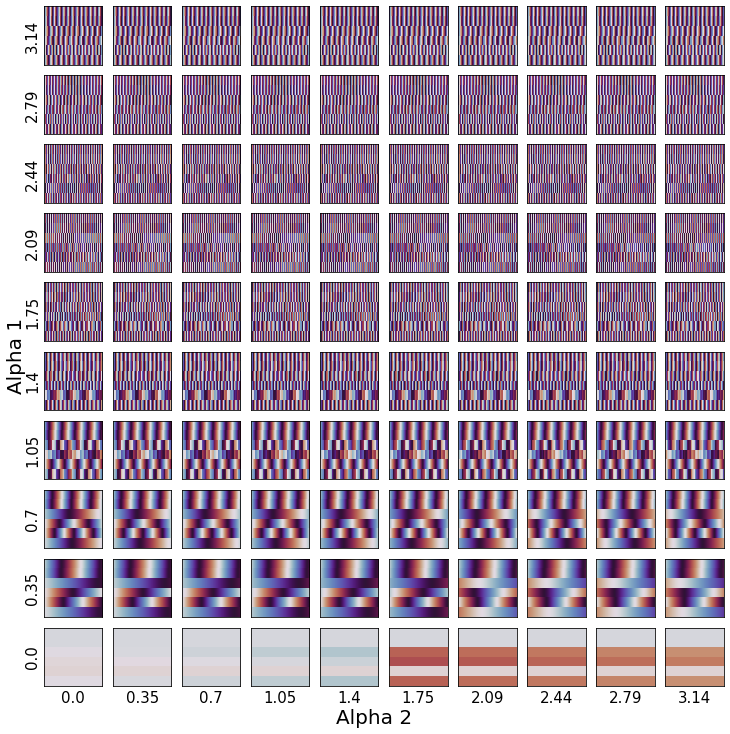

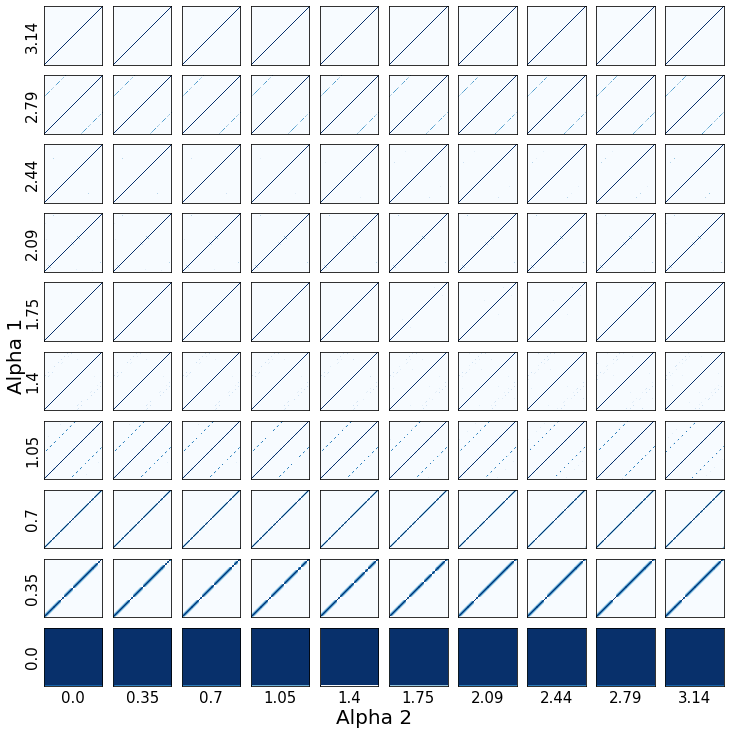

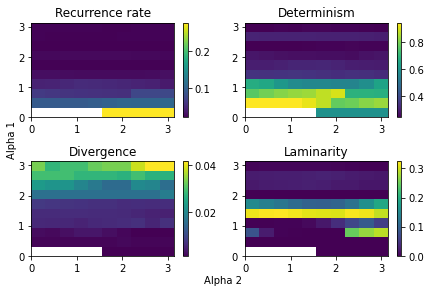

In [13]:
folder = "./results/"

path = folder + "house_triangle_cyle_semi_hole.pkl"
filename = "house_triangle_cyle_semi_hole.pdf"
plot_phases(path, filename)
plot_recurences(path, filename, eps=0.1, steps=10)
plot_rqa(path, filename, frac=0.2, min_rr=0.3)

## Two cliques one hole

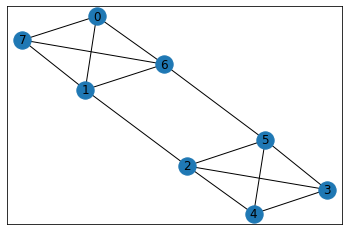

In [14]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(6,7,weight=1,edge_com=0)
G.add_edge(7,0,weight=1,edge_com=0)
G.add_edge(0,6,weight=1,edge_com=0)
G.add_edge(1,7,weight=1,edge_com=0)

G.add_edge(1,6,weight=1,edge_com=2)

G.add_edge(2,3,weight=1,edge_com=1)
G.add_edge(3,4,weight=1,edge_com=1)
G.add_edge(4,5,weight=1,edge_com=1)
G.add_edge(2,4,weight=1,edge_com=1)
G.add_edge(3,5,weight=1,edge_com=1)

G.add_edge(2,5,weight=1,edge_com=2)

G.add_edge(1,2,weight=1,edge_com=2)
G.add_edge(5,6,weight=1,edge_com=2)

node_com_dict=dict(zip(list(np.linspace(0,7,8).astype(int)),[0,0,1,1,1,1,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))



Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()